In [2]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [4]:
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

In [5]:
import tensorflow as tf
from tensorflow import keras

tf.__version__, keras.__version__

('2.0.0-beta1', '2.2.4-tf')

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_train_full.dtype

dtype('uint8')

In [9]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

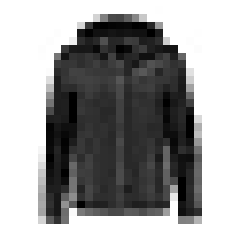

In [11]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()

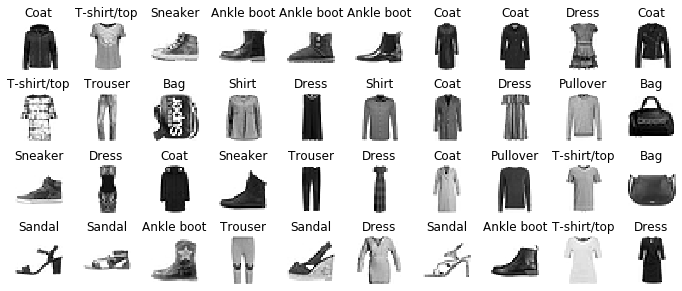

In [12]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis("off")
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.layers

In [16]:
model.layers[1].name

'dense'

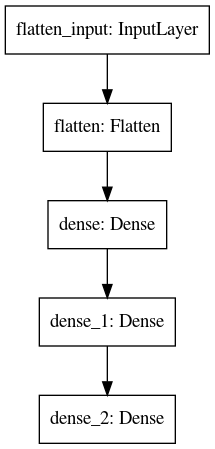

In [17]:
keras.utils.plot_model(model)

In [19]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [20]:
weights

array([[-0.04094511, -0.03828414,  0.04966384, ..., -0.03993126,
         0.02684697, -0.03747418],
       [-0.03753949,  0.05439237, -0.05031716, ...,  0.00321243,
        -0.01386073,  0.05852255],
       [ 0.00436036,  0.06216928,  0.02225175, ...,  0.05976702,
        -0.01584253,  0.06368476],
       ...,
       [ 0.06583123,  0.04749946,  0.01046634, ..., -0.06359418,
        -0.04002832, -0.02330944],
       [ 0.03190658,  0.02729329, -0.01894527, ...,  0.02445683,
        -0.05019257, -0.05124764],
       [ 0.06935829, -0.043961  , -0.03826979, ...,  0.0460868 ,
        -0.01495798,  0.06403467]], dtype=float32)

In [21]:
weights.shape

(784, 300)

In [22]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [23]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [27]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 3s 60us/sample - loss: 0.2184 - accuracy: 0.9222 - val_loss: 0.3173 - val_accuracy: 0.8828
Epoch 2/30
55000/55000 [==============================] - 3s 59us/sample - loss: 0.2142 - accuracy: 0.9237 - val_loss: 0.3225 - val_accuracy: 0.8864
Epoch 3/30
55000/55000 [==============================] - 3s 58us/sample - loss: 0.2108 - accuracy: 0.9251 - val_loss: 0.2937 - val_accuracy: 0.8932
Epoch 4/30
55000/55000 [==============================] - 3s 60us/sample - loss: 0.2083 - accuracy: 0.9258 - val_loss: 0.3045 - val_accuracy: 0.8916
Epoch 5/30
55000/55000 [==============================] - 3s 60us/sample - loss: 0.2046 - accuracy: 0.9267 - val_loss: 0.2938 - val_accuracy: 0.8942
Epoch 6/30
55000/55000 [==============================] - 3s 59us/sample - loss: 0.2004 - accuracy: 0.9284 - val_loss: 0.2858 - val_accuracy: 0.8944
Epoch 7/30
55000/55000 [==============================] -

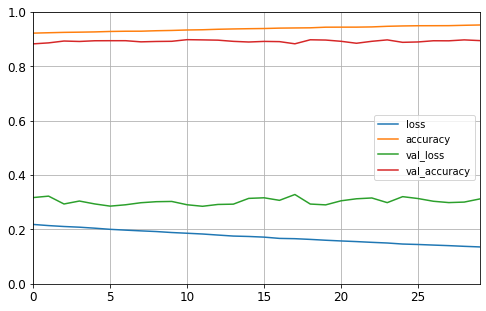

In [28]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [29]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.3456 - accuracy: 0.8880


[0.345646380263567, 0.888]

In [30]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.95, 0.  , 0.05, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [31]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [32]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [33]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

I0809 23:30:22.590400 140475622176576 california_housing.py:114] Downloading Cal. housing from https://ndownloader.figshare.com/files/5976036 to /home/joschi/scikit_learn_data


In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [36]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train_scaled, y_train, epochs=20,
                    validation_data=(X_valid_scaled, y_valid))
mse_test = model.evaluate(X_test_scaled, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 48us/sample - loss: 0.7687 - val_loss: 0.5789
Epoch 2/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.4339 - val_loss: 0.4083
Epoch 3/20
11610/11610 [==============================] - 0s 43us/sample - loss: 0.4011 - val_loss: 0.3944
Epoch 4/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.3927 - val_loss: 0.3909
Epoch 5/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.3831 - val_loss: 0.3813
Epoch 6/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.3819 - val_loss: 0.3804
Epoch 7/20
11610/11610 [==============================] - 0s 43us/sample - loss: 0.3759 - val_loss: 0.3763
Epoch 8/20
11610/11610 [==============================] - 1s 43us/sample - loss: 0.3698 - val_loss: 0.3804
Epoch 9/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.3677 - val_l

In [ ]:
X_new = X_test_scaled[:3]
y_pred = model.predict(X_new)

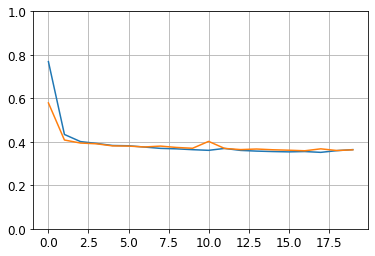

In [37]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [38]:
y_pred

array([[3.5174122],
       [1.483104 ],
       [1.6215127]], dtype=float32)

In [40]:
input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input], outputs=[output])

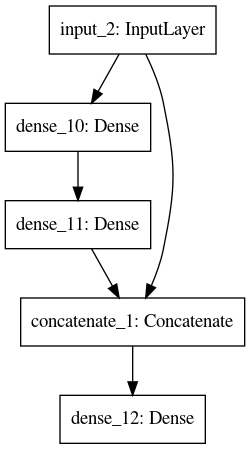

In [41]:
keras.utils.plot_model(model)

In [42]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

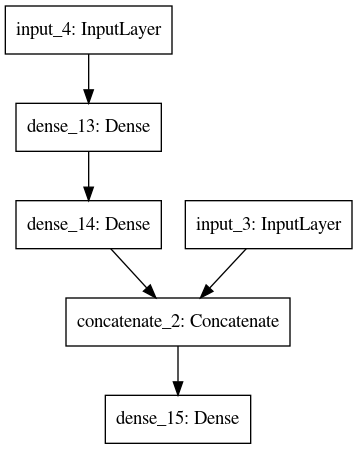

In [43]:
keras.utils.plot_model(model)

In [45]:
model.compile(loss="mse", optimizer="sgd")

X_train_A, X_train_B = X_train_scaled[:, :5], X_train_scaled[:, 2:]
X_valid_A, X_valid_B = X_valid_scaled[:, :5], X_valid_scaled[:, 2:]
X_test_A, X_test_B = X_test_scaled[:, :5], X_test_scaled[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=30,
                   validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 60us/sample - loss: 0.8520 - val_loss: 1.2524
Epoch 2/30
11610/11610 [==============================] - 1s 52us/sample - loss: 0.5302 - val_loss: 0.4605
Epoch 3/30
11610/11610 [==============================] - 1s 50us/sample - loss: 0.4470 - val_loss: 0.6045
Epoch 4/30
11610/11610 [==============================] - 1s 52us/sample - loss: 0.4185 - val_loss: 0.4263
Epoch 5/30
11610/11610 [==============================] - 1s 51us/sample - loss: 0.4118 - val_loss: 0.4184
Epoch 6/30
11610/11610 [==============================] - 1s 53us/sample - loss: 0.4006 - val_loss: 0.4838
Epoch 7/30
11610/11610 [==============================] - 1s 51us/sample - loss: 0.3961 - val_loss: 0.3938
Epoch 8/30
11610/11610 [==============================] - 1s 51us/sample - loss: 0.3839 - val_loss: 0.3849
Epoch 9/30
11610/11610 [==============================] - 1s 52us/sample - loss: 0.3825 - val_l

In [46]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [47]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

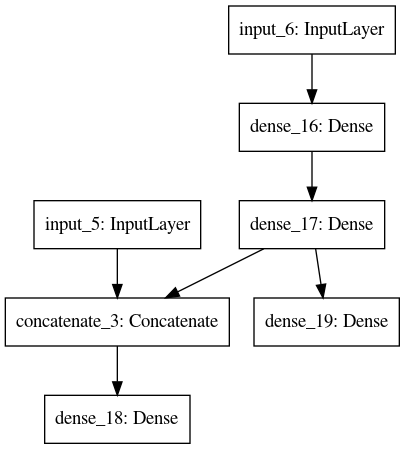

In [48]:
keras.utils.plot_model(model)

In [49]:
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=30,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 89us/sample - loss: 0.9020 - dense_18_loss: 0.8157 - dense_19_loss: 1.6779 - val_loss: 0.5213 - val_dense_18_loss: 0.4752 - val_dense_19_loss: 0.9358
Epoch 2/30
11610/11610 [==============================] - 1s 75us/sample - loss: 0.4849 - dense_18_loss: 0.4477 - dense_19_loss: 0.8205 - val_loss: 0.4647 - val_dense_18_loss: 0.4357 - val_dense_19_loss: 0.7250
Epoch 3/30
11610/11610 [==============================] - 1s 72us/sample - loss: 0.4423 - dense_18_loss: 0.4151 - dense_19_loss: 0.6879 - val_loss: 0.4399 - val_dense_18_loss: 0.4157 - val_dense_19_loss: 0.6578
Epoch 4/30
11610/11610 [==============================] - 1s 73us/sample - loss: 0.4233 - dense_18_loss: 0.4000 - dense_19_loss: 0.6324 - val_loss: 0.4247 - val_dense_18_loss: 0.4031 - val_dense_19_loss: 0.6182
Epoch 5/30
11610/11610 [==============================] - 1s 75us/sample - loss: 0.4224 - dense_18_loss: 0.

In [50]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

5160/5160 [==============================] - 0s 44us/sample - loss: 0.3680 - dense_18_loss: 0.3582 - dense_19_loss: 0.4697


In [51]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [52]:
y_pred_main

array([[3.6859925],
       [1.6000516],
       [1.4417946]], dtype=float32)

In [53]:
y_pred_aux

array([[3.5671175],
       [1.5984175],
       [1.3611419]], dtype=float32)

In [54]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

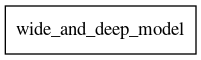

In [55]:
model = WideAndDeepModel()
keras.utils.plot_model(model)